# Task 2 - Stock Market Prediction and Forecasting using LSTM

***Observation :*** https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

### Import all the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
# Shape of the dataset

data.shape

(2035, 8)

In [5]:
# gathering information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
# describe the dataset

data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
# check data types

data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [8]:
# chek null values

data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

### Data Visualization

<Axes: >

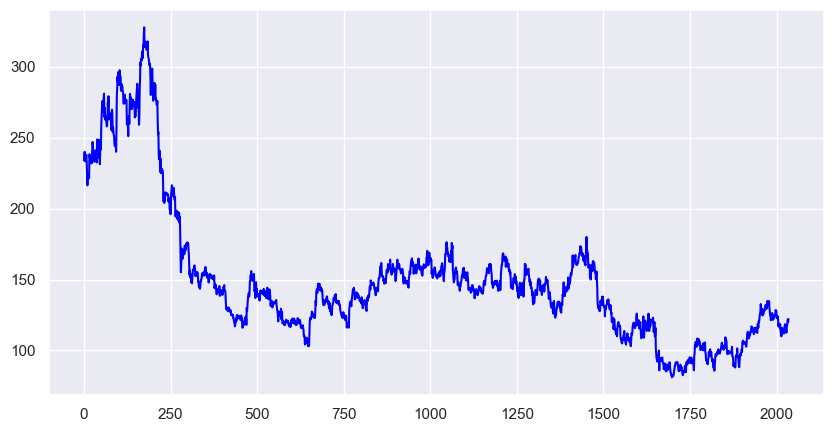

In [9]:
sns.set(rc = {'figure.figsize': (10, 5)})
data['Open'].plot(color = 'blue')

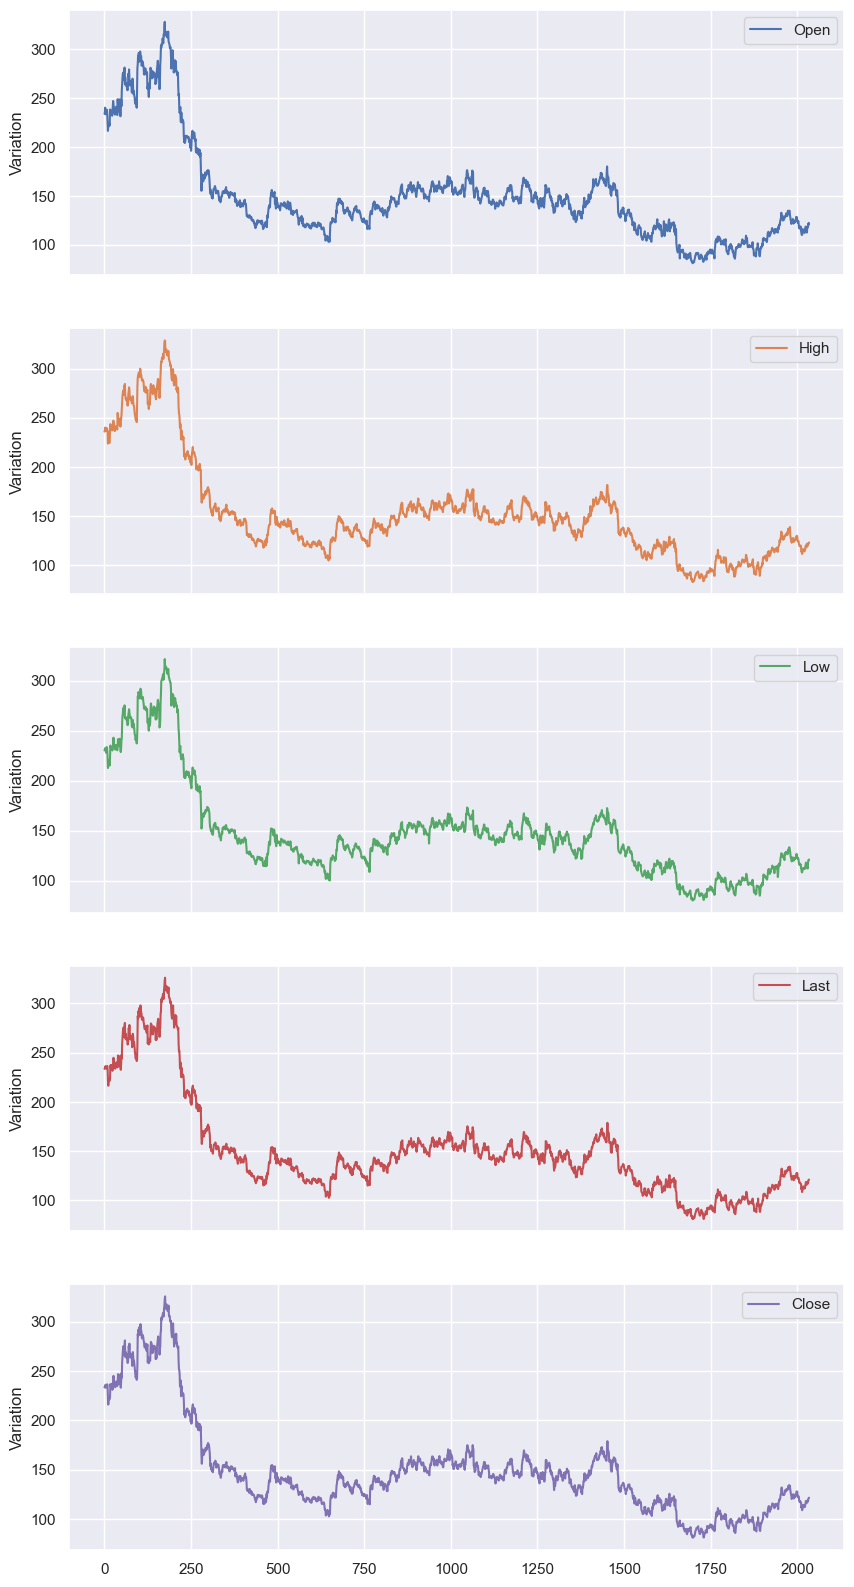

In [10]:
cols_plot = ['Open','High','Low','Last','Close']
axes = data[cols_plot].plot(alpha = 1, figsize = (10, 20), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')

<Axes: >

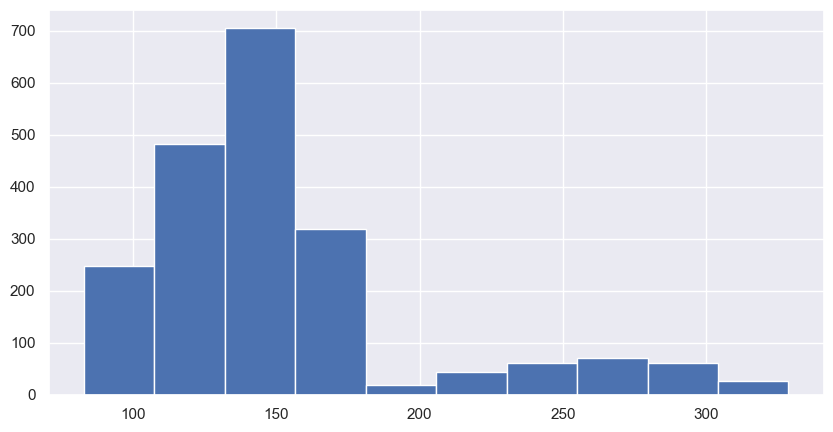

In [11]:
data['High'].hist()

<Axes: >

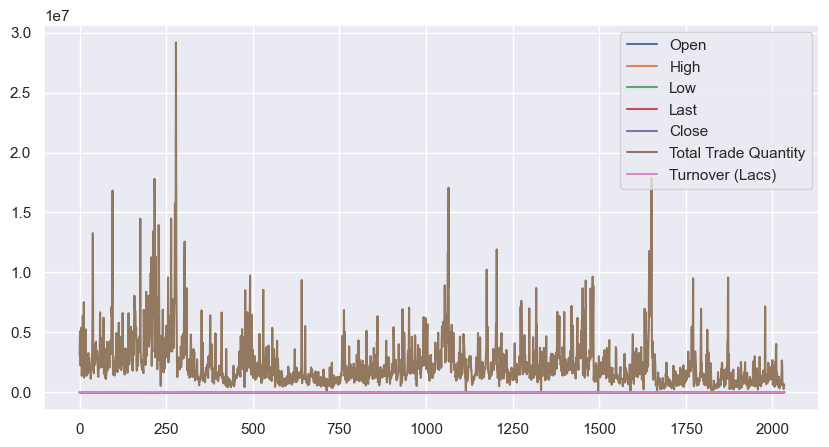

In [12]:
data.plot()

In [13]:
# 7 day rolling mean

data.rolling(7).mean().head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
7,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
8,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714
9,233.185714,237.728571,230.171429,234.928571,234.928571,3.527693e+06,8241.347143


<Axes: >

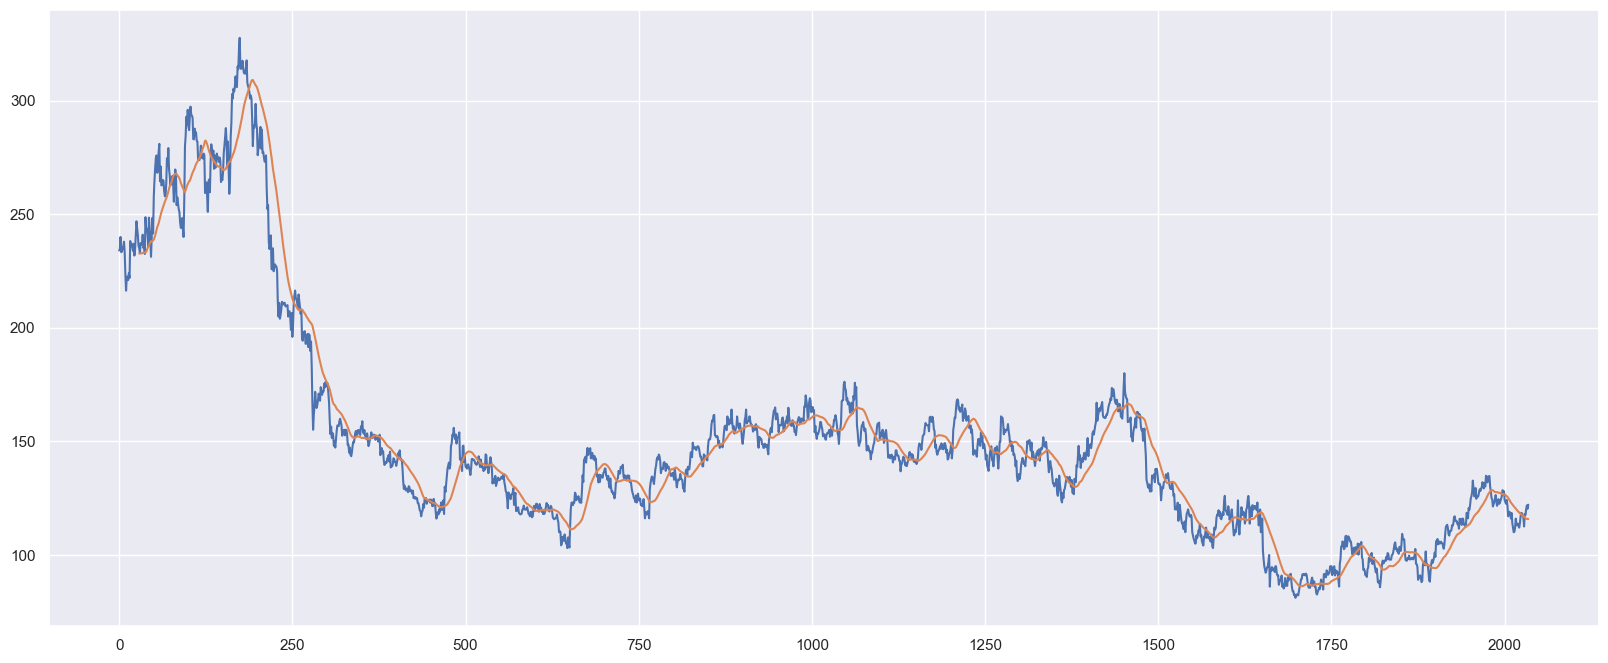

In [14]:
data['Open'].plot(figsize = (20,8),alpha = 1)
data.rolling(window = 30).mean()['Close'].plot(alpha = 1)

<Axes: >

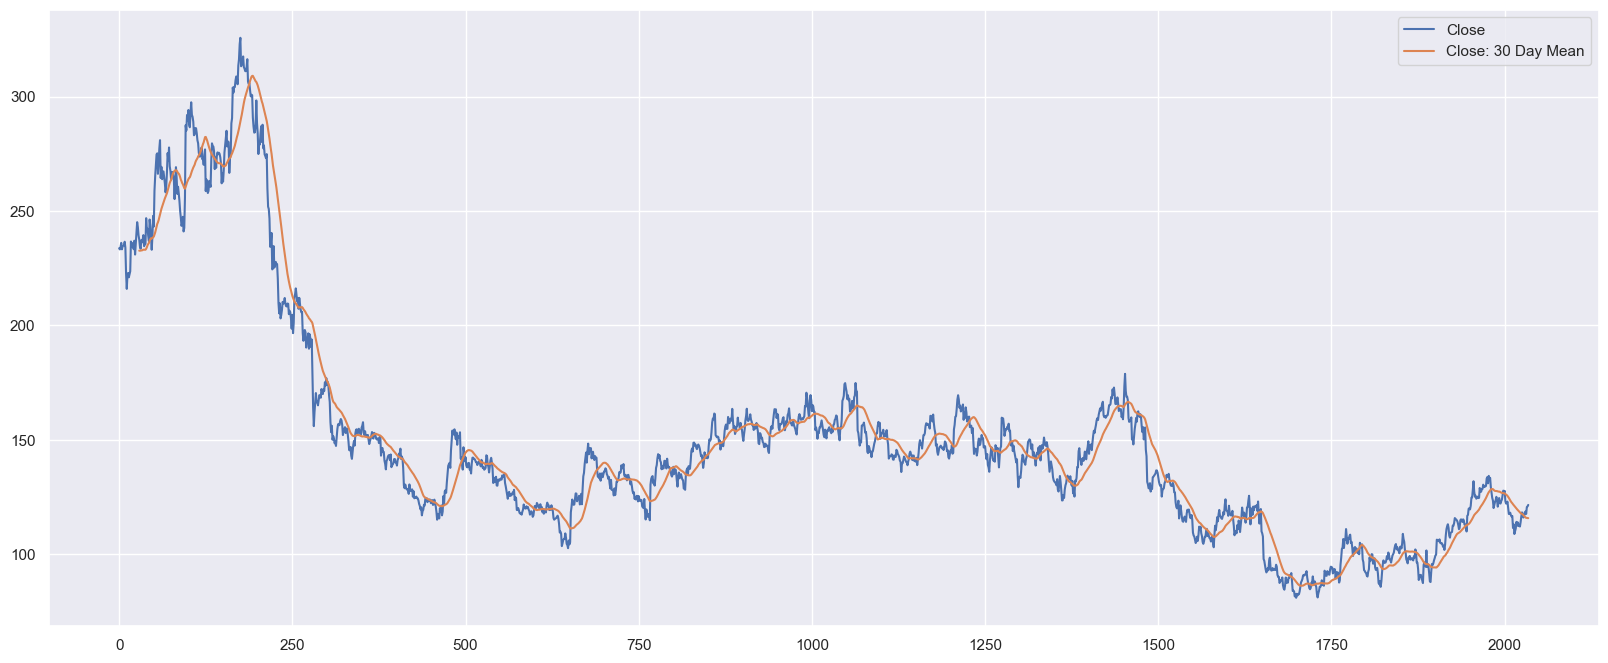

In [15]:
data['Close: 30 Day Mean'] = data['Close'].rolling(window = 30).mean()
data[['Close', 'Close: 30 Day Mean']].plot(figsize = (20,8), alpha = 1)

<Axes: >

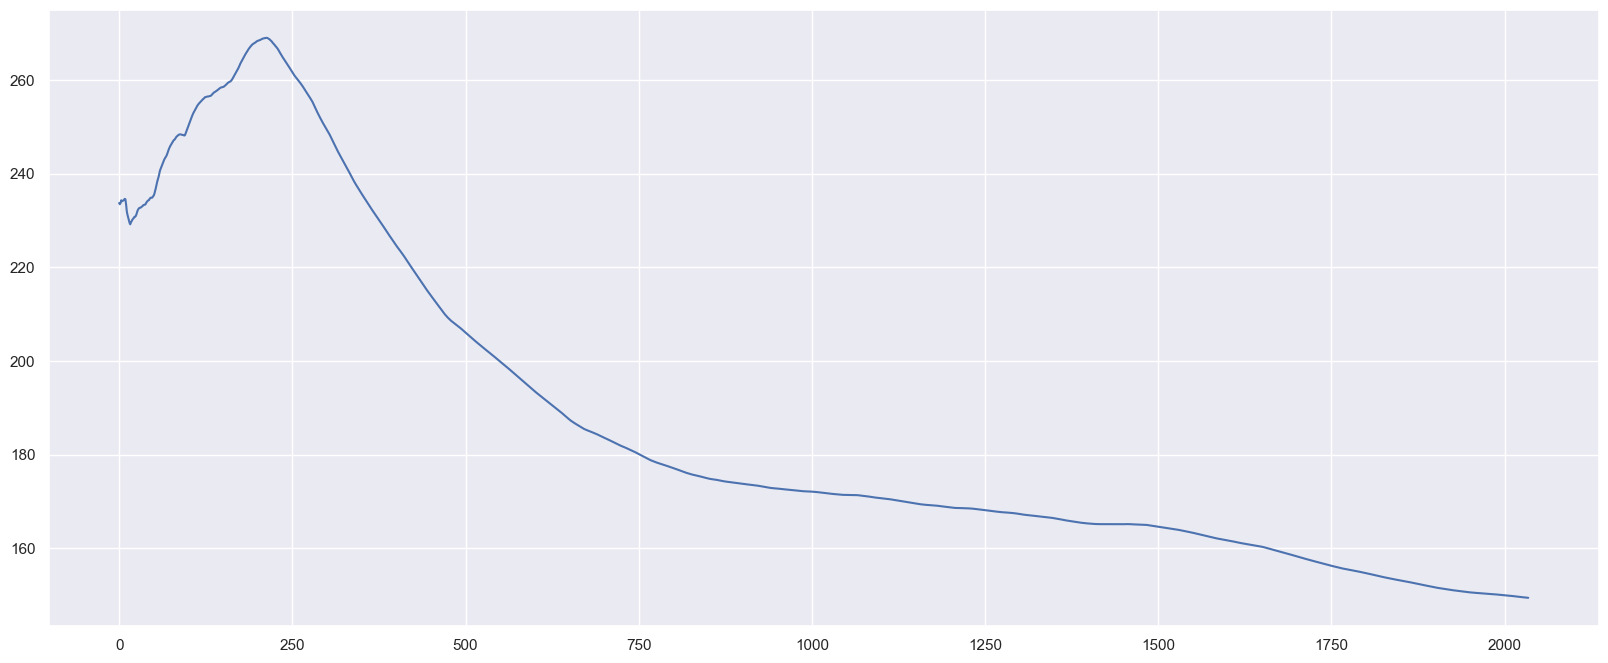

In [16]:
# Optional specify a minimum numbe2of periods

data['Close'].expanding(min_periods = 1).mean().plot(figsize = (20,8),alpha = 1)

In [17]:
data1 = data.reset_index()['Close']
data1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

<Axes: >

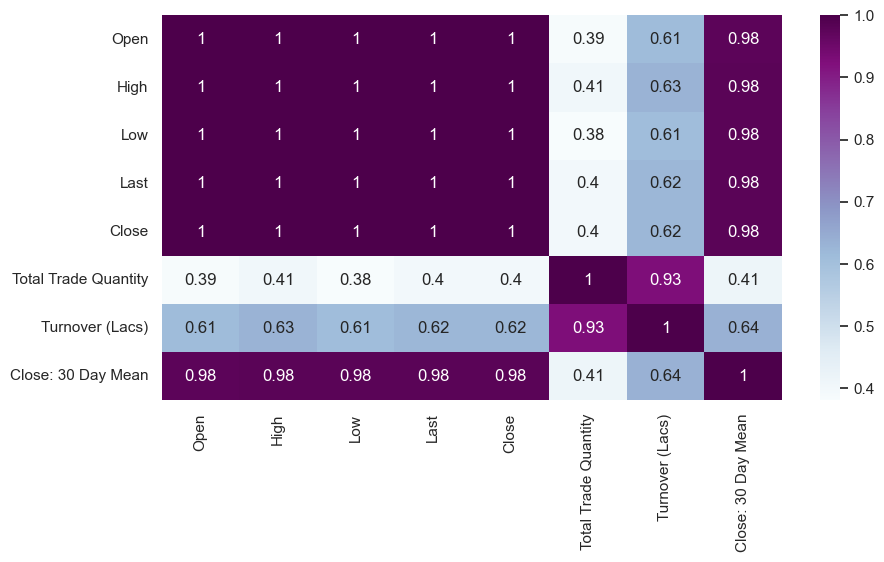

In [18]:
sns.heatmap(data.corr(), annot = True,cmap = 'BuPu')

<Axes: ylabel='Turnover (Lacs)'>

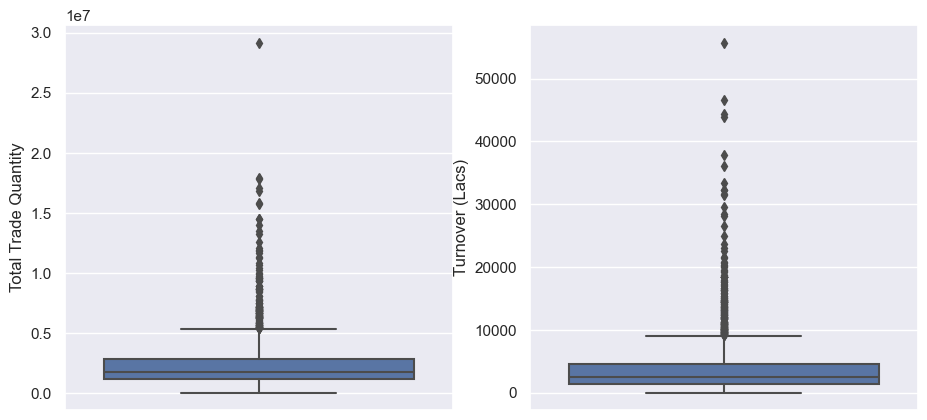

In [19]:
plt.figure(figsize = (11,5))

plt.subplot(1,2,1)
sns.boxplot(data = data, y = 'Total Trade Quantity')

plt.subplot(1,2,2)
sns.boxplot(data = data, y = 'Turnover (Lacs)')

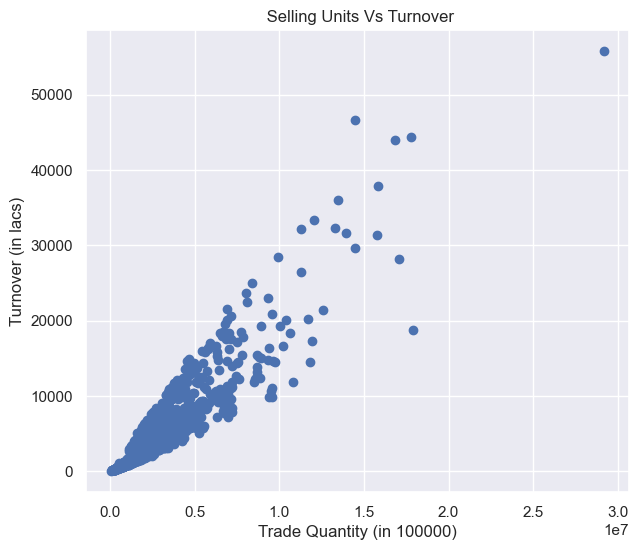

In [20]:
fig = plt.figure(figsize = (7,6))

plt.scatter(data['Total Trade Quantity'], data['Turnover (Lacs)'])

plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")

plt.show()

In [21]:
train = data[['Open']]
train = pd.DataFrame(train)
train

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


### Feature Scaling

In [22]:
# LSTM are sensitive to the scale of the data. so we apply MinMax scaler

scaler = MinMaxScaler(feature_range = (0,1))
train_scaler = scaler.fit_transform(np.array(data1).reshape(-1, 1))

In [23]:
train_scaler

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

### splitting dataset into train and test split

In [24]:
train_size = int(len(train_scaler) * 0.65)
test_size = int(len(train_scaler)) - train_size
train_data, test_data = train_scaler[0 : train_size, :], train_scaler[train_size : len(data), : 1] 

In [25]:
train_size, test_size

(1322, 713)

### convert an array of values into a dataset matrix

In [26]:
def create_dataset(dataset, time_step = 1):
    train_X, train_Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]   
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return np.array(train_X), np.array(train_Y)

***reshape into X=t,t+1,t+2,t+3 and Y=t+4***

In [27]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1221, 100), (1221,), (612, 100), (612,))

### reshape input to be [samples, time steps, features] which is required for LSTM

In [29]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

### Create the Stacked LSTM model

In [30]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
20/20 [==============================] - 21s 495ms/step - loss: 0.0304 - val_loss: 0.0028
Epoch 2/100
20/20 [==============================] - 7s 371ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 3/100
20/20 [==============================] - 7s 359ms/step - loss: 0.0018 - val_loss: 9.7980e-04
Epoch 4/100
20/20 [==============================] - 7s 359ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 7s 358ms/step - loss: 0.0016 - val_loss: 9.4571e-04
Epoch 6/100
20/20 [==============================] - 8s 380ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 7/100
20/20 [==============================] - 7s 361ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/100
20/20 [==============================] - 7s 364ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 9/100
20/20 [==============================] - 8s 381ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 10/100
20/20 [==============================] - 7s 377ms/step - loss: 0.0013

20/20 [==============================] - 6s 311ms/step - loss: 3.8641e-04 - val_loss: 5.2202e-04
Epoch 77/100
20/20 [==============================] - 7s 350ms/step - loss: 3.6532e-04 - val_loss: 3.8168e-04
Epoch 78/100
20/20 [==============================] - 6s 300ms/step - loss: 3.8295e-04 - val_loss: 3.3546e-04
Epoch 79/100
20/20 [==============================] - 6s 316ms/step - loss: 4.6550e-04 - val_loss: 4.1914e-04
Epoch 80/100
20/20 [==============================] - 6s 302ms/step - loss: 3.5193e-04 - val_loss: 3.7498e-04
Epoch 81/100
20/20 [==============================] - 6s 308ms/step - loss: 4.6676e-04 - val_loss: 2.8102e-04
Epoch 82/100
20/20 [==============================] - 6s 295ms/step - loss: 3.8986e-04 - val_loss: 3.3980e-04
Epoch 83/100
20/20 [==============================] - 6s 307ms/step - loss: 3.4717e-04 - val_loss: 3.0133e-04
Epoch 84/100
20/20 [==============================] - 6s 309ms/step - loss: 4.2583e-04 - val_loss: 2.9622e-04
Epoch 85/100
20/20 [===

### Lets Do the prediction and check performance metrics

In [33]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

20/20 [==============================] - 1s 65ms/step


In [34]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

### Calculate RMSE performance metrics

In [35]:
math.sqrt(mean_squared_error(y_train,train_predict))

167.2208741824999

### Test Data RMSE

In [36]:
math.sqrt(mean_squared_error(y_test,test_predict))

117.06092547416925

### shift train predictions for plotting

In [37]:
look_back = 100
trainPredictPlot = np.empty_like(train_scaler)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

### shift test predictions for plotting

In [38]:
testPredictPlot = np.empty_like(train_scaler)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(data1)-1, :] = test_predict

### plot baseline and predictions

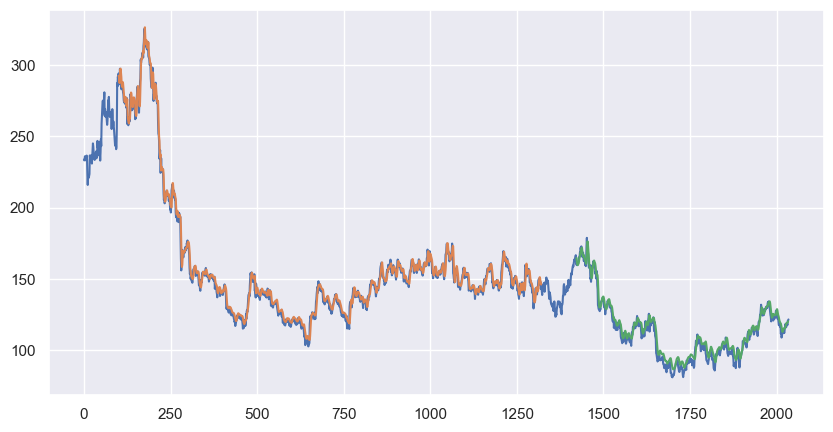

In [39]:
plt.figure(figsize = (10,5))

plt.plot(scaler.inverse_transform(train_scaler))

plt.plot(trainPredictPlot)

plt.plot(testPredictPlot)

plt.show()